## Exercise 1 : the MNIST dataset

Documentation of Keras: https://keras.io/api/

In [1]:
import keras
from keras.datasets import mnist
from keras import backend as K
from matplotlib import pyplot as plt

In [2]:
# load mnist dataset (available as a part of your Keras installation)
#------
# TO-DO
#------
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[5 0 4]


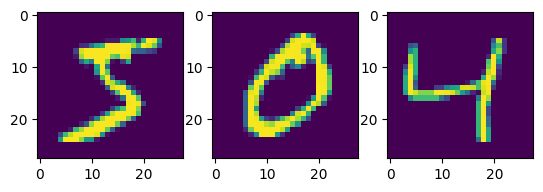

In [3]:
# display data shape and visualize some samples from the dataset
# ------
# TO-DO
# ------
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

plt.subplot(131)
plt.imshow(x_train[0])
plt.subplot(132)
plt.imshow(x_train[1])
plt.subplot(133)
plt.imshow(x_train[2])
print(y_train[0:3])

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

num_classes = 10
batch_size = 128
epochs = 12

In [5]:
# reshape the data arrays to have a single channel. default mode : channel_last
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
# rescale the pixel values to the range [0,1]

# i) convert the data type from unsigned integers to float32 
#------
# TO-DO
#------
x_train_f = x_train.astype(float)
x_test_f  = x_test.astype(float)

# ii) divide the pixel values by the max intensity value
#------
# TO-DO
#------

x_train_n = x_train_f / x_train_f.max()
x_test_n  = x_test_f  / x_test_f.max()

In [7]:
# convert class vectors to binary class matrices using keras.utils.to_categorical
#------
# TO-DO
#------

s = set(y_train)
s |= set(y_test)

num_classes = len(s)

y_train_b = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_b  = keras.utils.to_categorical(y_test, num_classes=num_classes)

print(y_train_b[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# a baseline CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

d:\GitRepo\TPS\2024-2025-ESIR-AA\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.1789 - loss: 2.2789 - val_accuracy: 0.4451 - val_loss: 2.1802
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.3599 - loss: 2.1573 - val_accuracy: 0.5598 - val_loss: 1.9922
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.4769 - loss: 1.9667 - val_accuracy: 0.6768 - val_loss: 1.7136
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.5704 - loss: 1.6992 - val_accuracy: 0.7578 - val_loss: 1.3778
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.6240 - loss: 1.4210 - val_accuracy: 0.7928 - val_loss: 1.0844
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.6643 - loss: 1.1966 - val_accuracy: 0.8195 - val_loss: 0.8717
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6958 - loss: 1.0367 - val_accuracy: 0.8335 - val_loss: 0.7336
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7196 -

[0.3493773639202118, 0.9059000015258789]

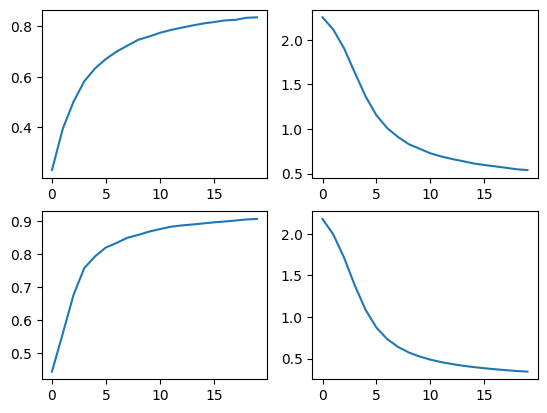

In [9]:
# compile the model using model.compile() with loss : categorical crossentropy, optimizer : adadelta, metrics : accuracy
#------
# TO-DO
#------

model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

# fit model using model.fit() using 20% of the dataset for validation
#------
# TO-DO
#------

history = model.fit(x_train_n,y_train_b,validation_split=0.2, epochs=20)

# plot the learning curves
#------
# TO-DO
#------

plt.subplot(221)
plt.plot(history.history['accuracy'])
plt.subplot(222)
plt.plot(history.history['loss'])
plt.subplot(223)
plt.plot(history.history['val_accuracy'])
plt.subplot(224)
plt.plot(history.history['val_loss'])

# evaluate the model using model.evaluate()
#------
# TO-DO
#------

model.evaluate(x_test_n,y_test_b)

## Exercise 2 : dogs vs cats

In [10]:
import os
from matplotlib.image import imread
import matplotlib.pyplot  as plt
import random
import numpy as np
import shutil
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

FileNotFoundError: [Errno 2] No such file or directory: './catsDogsSmall/cats_set/cat.4001.jpg'

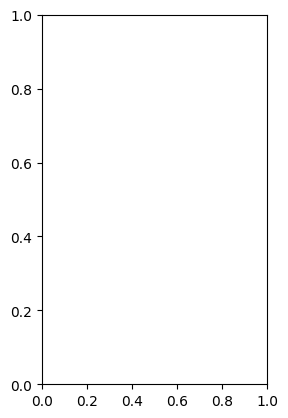

In [11]:
# define location of dataset
dataset = './catsDogsSmall'

# display some images of dogs and  cats
#------
# TO-DO
#------

plt.subplot(121)
plt.imshow(plt.imread(dataset + "/cats_set/cat.4001.jpg"))
plt.subplot(122)
plt.imshow(plt.imread(dataset + "/dogs_set/dog.4001.jpg"))

In [ ]:
"""
organize dataset into the following structure:

dataset
├── test
│   ├── cats
│   └── dogs
└── train
    ├── cats
    └── dogs
"""

# define ratio of images to use for validation (test folder)
val_ratio = 0.25

# create sub directories
# ------
# TO-DO
# ------

os.mkdir(dataset + "/test")
os.mkdir(dataset + "/train")
os.mkdir(dataset + "/test/cats")
os.mkdir(dataset + "/test/dogs")
os.mkdir(dataset + "/train/cats")
os.mkdir(dataset + "/train/dogs")

# copy training dataset images into subdirectories
# ------
# TO-DO
# ------

dataCats = os.listdir(dataset + "/cats_set")
dataDogs = os.listdir(dataset + "/dogs_set")

random.shuffle(dataCats)
random.shuffle(dataDogs)

dataCats_Train = dataCats[int(val_ratio * len(dataCats)):]
dataDogs_Train = dataDogs[int(val_ratio * len(dataDogs)):]

dataCats_Test = dataCats[0 : int(val_ratio * len(dataCats))]
dataDogs_Test = dataDogs[0 : int(val_ratio * len(dataDogs))]

for i in dataCats_Train:
    shutil.copy(dataset + "/cats_set/" + i, dataset + "/train/cats/" + i)

for i in dataDogs_Train:
    shutil.copy(dataset + "/dogs_set/" + i, dataset + "/train/dogs/" + i)

for i in dataCats_Test:
    shutil.copy(dataset + "/cats_set/" + i, dataset + "/test/cats/" + i)

for i in dataDogs_Test:
    shutil.copy(dataset + "/dogs_set/" + i, dataset + "/test/dogs/" + i)

FileExistsError: [WinError 183] Impossible de créer un fichier déjà existant: './catsDogsSmall/test'

In [ ]:
# define a cnn model

def cnn_model():
    
    # model architecture
    #------
    # TO-DO
    #------

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[200,200,3]))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model using model.compile() 
    #------
    # TO-DO
    #------

    model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# prepare the data for training the model
img_height = 200
img_width = 200
batch_size = 64

# the augmentation configuration for the training data
train_datagen = ImageDataGenerator(rescale=1.0/255.0) # rescaling pixel values to 0-1

# the augmentation configuration for the testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# flow_from_directory() on each data generator to create an iterator for train and test data
train_generator =  train_datagen.flow_from_directory(
                  directory=dataset + r'/train/',
                  target_size=(img_height, img_width), # resize to this size
                  batch_size=batch_size, # number of images to extract from folder for every batch
                  class_mode="binary" # classes to predict
                  )

test_generator =  test_datagen.flow_from_directory(
                  directory=dataset + r'/test/',
                  target_size=(img_height, img_width), # resize to this size
                  batch_size=batch_size, # number of images to extract from folder for every batch
                  class_mode="binary" # classes to predict
                  )

Found 750 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.4998 - loss: 0.0000e+00
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4934 - loss: 0.0000e+00
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4826 - loss: 0.0000e+00
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5039 - loss: 0.0000e+00
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.4865 - loss: 0.0000e+00
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.4863 - loss: 0.0000e+00
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5054 - loss: 0.0000e+00
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5142 - loss: 0.0000e+00
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.4894 - loss: 0.0000e+00
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.4854 - loss: 0.0000e+00
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5086 - loss: 0.0000e+00
Epoch 12/20
12/12 ━━━━━━━━━━━━

KeyError: 'val_accuracy'

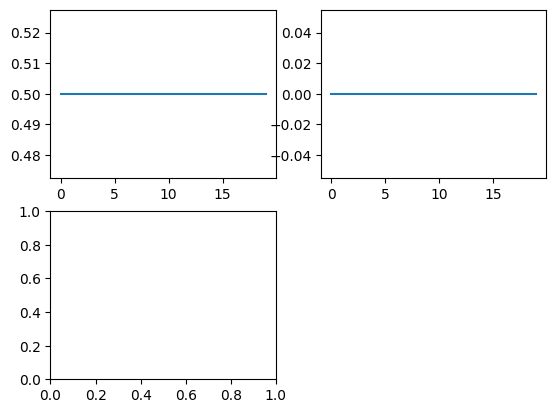

In [ ]:
# train model
#------
# TO-DO
#------

model = cnn_model()

history = model.fit(
    train_generator,
    epochs=20,
)

# plot the learning curves
#------
# TO-DO
#------

plt.subplot(221)
plt.plot(history.history['accuracy'])
plt.subplot(222)
plt.plot(history.history['loss'])
plt.subplot(223)
plt.plot(history.history['val_accuracy'])
plt.subplot(224)
plt.plot(history.history['val_loss'])

# evaluate the model
#------
# TO-DO
#------

model.evaluate(
    test_generator
)

In [ ]:
# EXERCISE 2.2.3

# transfer learning using VGG16 model
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Model
from keras.optimizers import SGD

def transfer_model():
    # load VGG16 model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier head
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
from keras.applications.vgg16 import preprocess_input

# preprocess data according to target model VGG16
train_datagen = ImageDataGenerator(
                preprocessing_function=preprocess_input
                )

#------
# TO-DO
#------